# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Regressão-Softmax-com-dados-do-MNIST,-programação-matricial" data-toc-modified-id="Regressão-Softmax-com-dados-do-MNIST,-programação-matricial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Softmax com dados do MNIST, programação matricial</a></div><div class="lev2 toc-item"><a href="#Importação-das-bibliotecas" data-toc-modified-id="Importação-das-bibliotecas-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importação das bibliotecas</a></div><div class="lev2 toc-item"><a href="#Funções-já-discutidas-em-notebooks-anteriores" data-toc-modified-id="Funções-já-discutidas-em-notebooks-anteriores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Funções já discutidas em notebooks anteriores</a></div><div class="lev2 toc-item"><a href="#Carregamento-dos-dados-do-MNIST,-disponível-no-Keras." data-toc-modified-id="Carregamento-dos-dados-do-MNIST,-disponível-no-Keras.-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Carregamento dos dados do MNIST, disponível no <code>Keras</code>.</a></div><div class="lev2 toc-item"><a href="#Organizando-e-normalizando-os-dados" data-toc-modified-id="Organizando-e-normalizando-os-dados-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Organizando e normalizando os dados</a></div><div class="lev2 toc-item"><a href="#Visualizando-os-dados" data-toc-modified-id="Visualizando-os-dados-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualizando os dados</a></div><div class="lev2 toc-item"><a href="#Visualizando-uma-imagem-com-o-matplotlib" data-toc-modified-id="Visualizando-uma-imagem-com-o-matplotlib-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualizando uma imagem com o matplotlib</a></div><div class="lev2 toc-item"><a href="#Laço-principal---treinamento" data-toc-modified-id="Laço-principal---treinamento-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Laço principal - treinamento</a></div><div class="lev2 toc-item"><a href="#Visulizando-gráfico-de-perda-durante-o-treinamento" data-toc-modified-id="Visulizando-gráfico-de-perda-durante-o-treinamento-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Visulizando gráfico de perda durante o treinamento</a></div><div class="lev2 toc-item"><a href="#Avaliando-a-acurácia-tanto-no-conjunto-de-treinamento-como-no-conjunto-de-testes" data-toc-modified-id="Avaliando-a-acurácia-tanto-no-conjunto-de-treinamento-como-no-conjunto-de-testes-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Avaliando a acurácia tanto no conjunto de treinamento como no conjunto de testes</a></div><div class="lev2 toc-item"><a href="#Matriz-de-confusão-com-dados-de-treinamento-e-teste" data-toc-modified-id="Matriz-de-confusão-com-dados-de-treinamento-e-teste-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Matriz de confusão com dados de treinamento e teste</a></div><div class="lev2 toc-item"><a href="#Visualizando-a-matriz-de-pesos-treinados" data-toc-modified-id="Visualizando-a-matriz-de-pesos-treinados-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Visualizando a matriz de pesos treinados</a></div><div class="lev2 toc-item"><a href="#Visualizando-os-pesos-de-todas-as-classes" data-toc-modified-id="Visualizando-os-pesos-de-todas-as-classes-112"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Visualizando os pesos de todas as classes</a></div><div class="lev2 toc-item"><a href="#Diagrama-da-regressão-softmax-com-visualização-dos-pesos-W" data-toc-modified-id="Diagrama-da-regressão-softmax-com-visualização-dos-pesos-W-113"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Diagrama da regressão softmax com visualização dos pesos W</a></div><div class="lev3 toc-item"><a href="#Exercício" data-toc-modified-id="Exercício-1131"><span class="toc-item-num">1.13.1&nbsp;&nbsp;</span>Exercício</a></div><div class="lev2 toc-item"><a href="#Atividades" data-toc-modified-id="Atividades-114"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Atividades</a></div><div class="lev3 toc-item"><a href="#Perguntas" data-toc-modified-id="Perguntas-1141"><span class="toc-item-num">1.14.1&nbsp;&nbsp;</span>Perguntas</a></div><div class="lev2 toc-item"><a href="#Conclusões-sobre-os-experimentos-deste-notebook" data-toc-modified-id="Conclusões-sobre-os-experimentos-deste-notebook-115"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Conclusões sobre os experimentos deste notebook</a></div>

# Regressão Softmax com dados do MNIST, programação matricial

O objetivo deste notebook é ilustrar o uso do mesmo código matricial desenvolvido para a classificação das Flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.


## Importação das bibliotecas

Iremos usar adicional biblioteca de visualização do pacote ia898

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from keras.datasets import mnist

import pandas as pd

import sys,os
sys.path.append(os.path.abspath('../../')) # para importar ia898
import ia898.src as ia

Using TensorFlow backend.


## Funções já discutidas em notebooks anteriores

In [2]:
def oneHotIt(Y,k):
    Y = Y.reshape(-1,1)
    i = np.arange(k).reshape(1,k)
    Y_oh = (Y == i).astype(int)
    return Y_oh

def softmax(Z):
    # computes softmax for all samples, normalize among classes (columns)
    # input Z: scores; shape: samples rows x classes columns
    # output S: same shape of input
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims=True) # normaliza nas classes - colunas
    return S

def predict(X,WT):
    Y_oh_hat = softmax(X.dot(WT))
    # escolhe a maior probabilidade entre as classes
    Y_hat = np.argmax(Y_oh_hat,axis=1) # mantém o resultado como matriz bidimensional
    return Y_hat

def getAccuracy(X,WT, Y):
    Y_hat = predict(X,WT)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

## Carregamento dos dados do MNIST, disponível no `Keras`.

O Keras possui facilidade para carregar o dataset MNIST

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train.shape=",X_train.shape)
print("Y_train.shape=",Y_train.shape)
print("X_test.shape=",X_test.shape)
print("Y_test.shape=",Y_test.shape)

X_train.shape= (60000, 28, 28)
Y_train.shape= (60000,)
X_test.shape= (10000, 28, 28)
Y_test.shape= (10000,)


## Organizando e normalizando os dados

Neste exemplo utilizaremos 500 amostras de treinamento e 100 amostras para testes.


In [4]:
n_train = 1000
n_test = 200

Y = Y_train[:n_train]
Y_oh = oneHotIt(Y,10)

X = X_train[:n_train].reshape((-1,28*28))/255.
X_bias = np.hstack([np.ones((n_train,1)),X]) # incluído X00 como 1 para gerar bias no W
testY = Y_test[:n_test]
testX = X_test[:n_test].reshape((-1,28*28))/255.
testX_bias = np.hstack([np.ones((n_test,1)),testX]) # incluído X00 como 1 para gerar bias no W

print('X.shape:', X.shape)
print('Y.shape:', Y.shape)
print('Y_oh.shape:', Y_oh.shape)

X.shape: (1000, 784)
Y.shape: (1000,)
Y_oh.shape: (1000, 10)


## Visualizando os dados

In [5]:
nb = ia.nbshow(ncols=20)
for i in range(60):
    nb.nbshow(np.uint8(X[i].reshape((28,28))*255),'%d'% (Y_train[i],))
nb.nbshow()

""
5
""
0
""
4
""
1
""
9
""


## Visualizando uma imagem com o matplotlib

class: 5


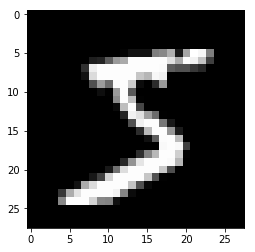

In [6]:
plt.imshow(np.reshape(X[0],(28,28)),cmap = 'gray') # retirando primeira coluna (bias no W)
print('class:',Y[0])

## Laço principal - treinamento

In [7]:
n_amostras = X_bias.shape[0] # number of training examples
n_atributos = X_bias.shape[1] # number of attributes (features, pixels + 1(bias))
n_classes = 10         # number of classes
WT = np.zeros((n_atributos,n_classes)) # n. de linhas é igual a número de atributos (features, pixels)
epochs = 1000
learningRate = 0.5
losses = []
for i in range(epochs):
    Z = X_bias.dot(WT)
    Y_oh_hat = softmax(Z)
    loss = (-1. / n_amostras) * np.sum(Y_oh * np.log(Y_oh_hat))
    Grad = (-1. / n_amostras) * (X_bias.T).dot(Y_oh - Y_oh_hat)
    WT = WT - (learningRate * Grad)
    losses.append(loss)
print('Final loss:',loss)

Final loss: 0.0453404019658


## Visulizando gráfico de perda durante o treinamento

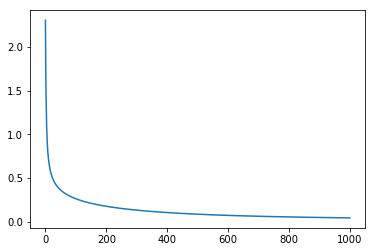

In [8]:
plt.plot(losses)

## Avaliando a acurácia tanto no conjunto de treinamento como no conjunto de testes

In [9]:
def getAccuracy(X,WT, Y):
    Y_hat = predict(X,WT)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

print('Training Accuracy: ', getAccuracy(X_bias,WT,Y))
print('Test Accuracy: ', getAccuracy(testX_bias,WT,testY))

Training Accuracy:  1.0
Test Accuracy:  0.905


## Matriz de confusão com dados de treinamento e teste

In [10]:
print('Matriz de confusão (Treino):')
display(pd.crosstab(predict(X_bias,WT), Y))

print('Matriz de confusão (Teste):')
display(pd.crosstab(predict(testX_bias,WT), testY))

Matriz de confusão (Treino):


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,0,0,0,0,0,0,0,0
1,0,116,0,0,0,0,0,0,0,0
2,0,0,99,0,0,0,0,0,0,0
3,0,0,0,93,0,0,0,0,0,0
4,0,0,0,0,105,0,0,0,0,0
5,0,0,0,0,0,92,0,0,0,0
6,0,0,0,0,0,0,94,0,0,0
7,0,0,0,0,0,0,0,117,0,0
8,0,0,0,0,0,0,0,0,87,0


Matriz de confusão (Teste):


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,16,0,0,0,0,0,0,0,0,0
1,0,28,0,0,0,0,0,0,0,0
2,0,0,13,1,0,1,1,0,0,0
3,1,0,1,13,0,0,0,2,0,1
4,0,0,1,0,24,0,0,1,0,0
5,0,0,0,2,0,19,0,0,0,0
6,0,0,1,0,2,0,19,0,0,0
7,0,0,0,0,0,0,0,20,0,1
8,0,0,0,0,0,0,0,0,10,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

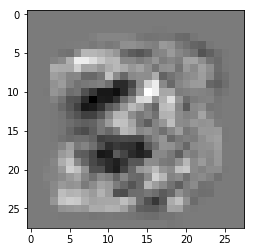

In [11]:
# Visualizando pesos da classe 3
plt.imshow(WT[1:,3].reshape((28,28)),cmap = 'gray')

## Visualizando os pesos de todas as classes

In [12]:
for i in range(n_classes):
    img = WT[1:,i].reshape((28,28)).copy()
    img -= img.min()
    img /= img.max()
    img = np.uint8(img*255)
    nb.nbshow(img,'%d'% (i,))
nb.nbshow()

""
0
""
1
""
2
""
3
""
4
""


## Diagrama da regressão softmax com visualização dos pesos W

<img src="../figures/RegressaoSoftmaxArgmaxNMIST.png",width = 400>


### Exercício

Na configuração da figura acima, mostre os valores de z0 até z9, os valores das probabilidades y_oh_hat e o y_hat, quando a rede recebe como entrada a nona amostra que contém o manuscrito do dígito '4':

In [13]:
X_d4 = X[9]
nb.nbshow((X_d4.reshape(28,28)*255).astype(np.uint8), flush=True)

""
""


## Atividades

### Perguntas
1. Por que no treino, a acurácia é 100%, mas no teste foi de 90,5%
2. Por que no treino, a acurácia é 100%, porém a função de perda final não é zero, mas sim 0,045 ?
3. O que se deve fazer para que a avaliação no conjunto de teste seja melhorado?

## Conclusões sobre os experimentos deste notebook
